In [3]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# 파일경로를 찾고, 변수 file_path에 저장
file_path = './read_csv_sample.csv'

In [2]:
# read_csv() 함수로 데이터프레임 변환. 변수 df1에 저장
df1 = pd.read_csv(file_path)
print(df1)
print('\n')

   c0  c1  c2  c3
0   0   1   4   7
1   1   2   5   8
2   2   3   6   9




In [4]:
# read_csv() 함수로 데이터프레임 변환. 변수 df2에 저장. header=None 옵션
df2 = pd.read_csv(file_path, header=None)
print(df2)

    0   1   2   3
0  c0  c1  c2  c3
1   0   1   4   7
2   1   2   5   8
3   2   3   6   9


In [5]:
print('\n')

# read_csv() 함수로 데이터프레임 변환. 변수 df3에 저장. index_col=None 옵션
df3 = pd.read_csv(file_path, index_col=None)
print(df3)
print('\n')



   c0  c1  c2  c3
0   0   1   4   7
1   1   2   5   8
2   2   3   6   9




In [6]:
# read_csv() 함수로 데이터프레임 변환. 변수 df4에 저장. index_col='c0' 옵션
df4 = pd.read_csv(file_path, index_col='c0')
print(df4)

    c1  c2  c3
c0            
0    1   4   7
1    2   5   8
2    3   6   9


In [7]:
# -*- coding: utf-8 -*-

import pandas as pd

# read_excel() 함수로 데이터프레임 변환 
df1 = pd.read_excel('./남북한발전전력량.xlsx')            # header=0 (default 옵션)
df2 = pd.read_excel('./남북한발전전력량.xlsx', header=None)  # header=None 옵션

# 데이터프레임 출력
print(df1)
print('\n')
print(df2)

  전력량 (억㎾h) 발전 전력별  1990  1991  1992  1993  1994  1995  1996  1997  ...  2007  \
0        남한     합계  1077  1186  1310  1444  1650  1847  2055  2244  ...  4031   
1       NaN     수력    64    51    49    60    41    55    52    54  ...    50   
2       NaN     화력   484   573   696   803  1022  1122  1264  1420  ...  2551   
3       NaN    원자력   529   563   565   581   587   670   739   771  ...  1429   
4       NaN    신재생     -     -     -     -     -     -     -     -  ...     -   
5        북한     합계   277   263   247   221   231   230   213   193  ...   236   
6       NaN     수력   156   150   142   133   138   142   125   107  ...   133   
7       NaN     화력   121   113   105    88    93    88    88    86  ...   103   
8       NaN    원자력     -     -     -     -     -     -     -     -  ...     -   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
1    56    56    65    78    77    84    78    58    66  
2  2658  2802  

In [8]:
# -*- coding: utf-8 -*-

import pandas as pd

# read_json() 함수로 데이터프레임 변환 
df = pd.read_json('./read_json_sample.json')  
print(df)
print('\n')
print(df.index)

           name  year        developer opensource
pandas           2008    Wes Mckinneye       True
NumPy            2006  Travis Oliphant       True
matplotlib       2003   John D. Hunter       True


Index(['pandas', 'NumPy', 'matplotlib'], dtype='object')


In [41]:
# -*- coding: utf-8 -*-

import pandas as pd

# HTML 파일 경로 or 웹 페이지 주소를 url 변수에 저장
url ='./sample.html'

# HTML 웹페이지의 표(table)를 가져와서 데이터프레임으로 변환 
tables = pd.read_html(url)

# 표(table)의 개수 확인
print(len(tables))
print('\n')

2




In [42]:
# tables 리스트의 원소를 iteration하면서 각각 화면 출력
for i in range(len(tables)):
    print("tables[%s]" % i)
    

tables[0]
tables[1]


In [43]:
day = 7
print("03-%s-2021"%(day))

03-7-2021


In [44]:
# 파이썬 패키지 정보가 들어 있는 두 번째 데이터프레임을 선택하여 df 변수에 저장
df = tables[1] 

# 'name' 열을 인덱스로 지정
df.set_index(['name'], inplace=True)
print(df)

            year        developer  opensource
name                                         
NumPy       2006  Travis Oliphant        True
matplotlib  2003   John D. Hunter        True
pandas      2008    Wes Mckinneye        True


In [46]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# 위키피디아 미국 ETF 웹 페이지에서 필요한 정보를 스크래핑하여 딕셔너리 형태로 변수 etfs에 저장
url = "https://en.wikipedia.org/wiki/List_of_American_exchange-traded_funds"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'lxml')   
rows = soup.select('div > ul > li')
    
etfs = {}

for row in rows:
    
    try:
        etf_name = re.findall('^(.*) \(NYSE', row.text)
        etf_market = re.findall('\((.*)\|', row.text)
        etf_ticker = re.findall('NYSE Arca\|(.*)\)', row.text)
        
        if (len(etf_ticker) > 0) & (len(etf_market) > 0) &(len(etf_name)>0):
            etfs[etf_ticker[0]] = [etf_market[0], etf_name[0]]

    except AttributeError as err:
        pass    

# etfs 딕셔너리 출력
print(etfs)
print('\n')

# etfs 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(etfs)
print(df)

{'DIA': ['NYSE Arca', 'DIAMONDS Trust, Series 1'], 'RSP': ['NYSE Arca', 'Guggenheim S&P 500 Equal Weight'], 'IOO': ['NYSE Arca', 'iShares S&P Global 100 Index'], 'IVV': ['NYSE Arca', 'iShares S&P 500 Index'], 'SPY': ['NYSE Arca', 'SPDR S&P 500'], 'VOO': ['NYSE Arca', 'Vanguard S&P 500'], 'IWM': ['NYSE Arca', 'iShares Russell 2000 Index'], 'OEF': ['NYSE Arca', 'iShares S&P 100 Index'], 'CVY': ['NYSE Arca', 'Guggenheim Multi-Asset Income'], 'RPG': ['NYSE Arca', 'Guggenheim S&P 500 Pure Growth ETF'], 'RPV': ['NYSE Arca', 'Guggenheim S&P 500 Pure Value ETF'], 'IWB': ['NYSE Arca', 'iShares Russell 1000 Index'], 'PKW': ['NYSE Arca', 'PowerShares Buyback Achievers'], 'PRF': ['NYSE Arca', 'PowerShares FTSE RAFI US 1000'], 'SPLV': ['NYSE Arca', 'PowerShares S&P 500 Low Volatility'], 'SCHX': ['NYSE Arca', 'Schwab US Large-Cap ETF'], 'SCHD': ['NYSE Arca', 'Schwab US Dividend Equity ETF'], 'FNDX': ['NYSE Arca', 'Schwab Fundamental U.S. Large Company Index ETF'], 'SDY': ['NYSE Arca', 'SPDR S&P Divi

In [47]:
etfs

{'DIA': ['NYSE Arca', 'DIAMONDS Trust, Series 1'],
 'RSP': ['NYSE Arca', 'Guggenheim S&P 500 Equal Weight'],
 'IOO': ['NYSE Arca', 'iShares S&P Global 100 Index'],
 'IVV': ['NYSE Arca', 'iShares S&P 500 Index'],
 'SPY': ['NYSE Arca', 'SPDR S&P 500'],
 'VOO': ['NYSE Arca', 'Vanguard S&P 500'],
 'IWM': ['NYSE Arca', 'iShares Russell 2000 Index'],
 'OEF': ['NYSE Arca', 'iShares S&P 100 Index'],
 'CVY': ['NYSE Arca', 'Guggenheim Multi-Asset Income'],
 'RPG': ['NYSE Arca', 'Guggenheim S&P 500 Pure Growth ETF'],
 'RPV': ['NYSE Arca', 'Guggenheim S&P 500 Pure Value ETF'],
 'IWB': ['NYSE Arca', 'iShares Russell 1000 Index'],
 'PKW': ['NYSE Arca', 'PowerShares Buyback Achievers'],
 'PRF': ['NYSE Arca', 'PowerShares FTSE RAFI US 1000'],
 'SPLV': ['NYSE Arca', 'PowerShares S&P 500 Low Volatility'],
 'SCHX': ['NYSE Arca', 'Schwab US Large-Cap ETF'],
 'SCHD': ['NYSE Arca', 'Schwab US Dividend Equity ETF'],
 'FNDX': ['NYSE Arca', 'Schwab Fundamental U.S. Large Company Index ETF'],
 'SDY': ['NYSE Arc

In [48]:
for i in etfs:
    print("etfs[%s]" % i)
    print(etfs[i])
    print('\n')


etfs[DIA]
['NYSE Arca', 'DIAMONDS Trust, Series 1']


etfs[RSP]
['NYSE Arca', 'Guggenheim S&P 500 Equal Weight']


etfs[IOO]
['NYSE Arca', 'iShares S&P Global 100 Index']


etfs[IVV]
['NYSE Arca', 'iShares S&P 500 Index']


etfs[SPY]
['NYSE Arca', 'SPDR S&P 500']


etfs[VOO]
['NYSE Arca', 'Vanguard S&P 500']


etfs[IWM]
['NYSE Arca', 'iShares Russell 2000 Index']


etfs[OEF]
['NYSE Arca', 'iShares S&P 100 Index']


etfs[CVY]
['NYSE Arca', 'Guggenheim Multi-Asset Income']


etfs[RPG]
['NYSE Arca', 'Guggenheim S&P 500 Pure Growth ETF']


etfs[RPV]
['NYSE Arca', 'Guggenheim S&P 500 Pure Value ETF']


etfs[IWB]
['NYSE Arca', 'iShares Russell 1000 Index']


etfs[PKW]
['NYSE Arca', 'PowerShares Buyback Achievers']


etfs[PRF]
['NYSE Arca', 'PowerShares FTSE RAFI US 1000']


etfs[SPLV]
['NYSE Arca', 'PowerShares S&P 500 Low Volatility']


etfs[SCHX]
['NYSE Arca', 'Schwab US Large-Cap ETF']


etfs[SCHD]
['NYSE Arca', 'Schwab US Dividend Equity ETF']


etfs[FNDX]
['NYSE Arca', 'Schwab Fundament

In [50]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))     
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

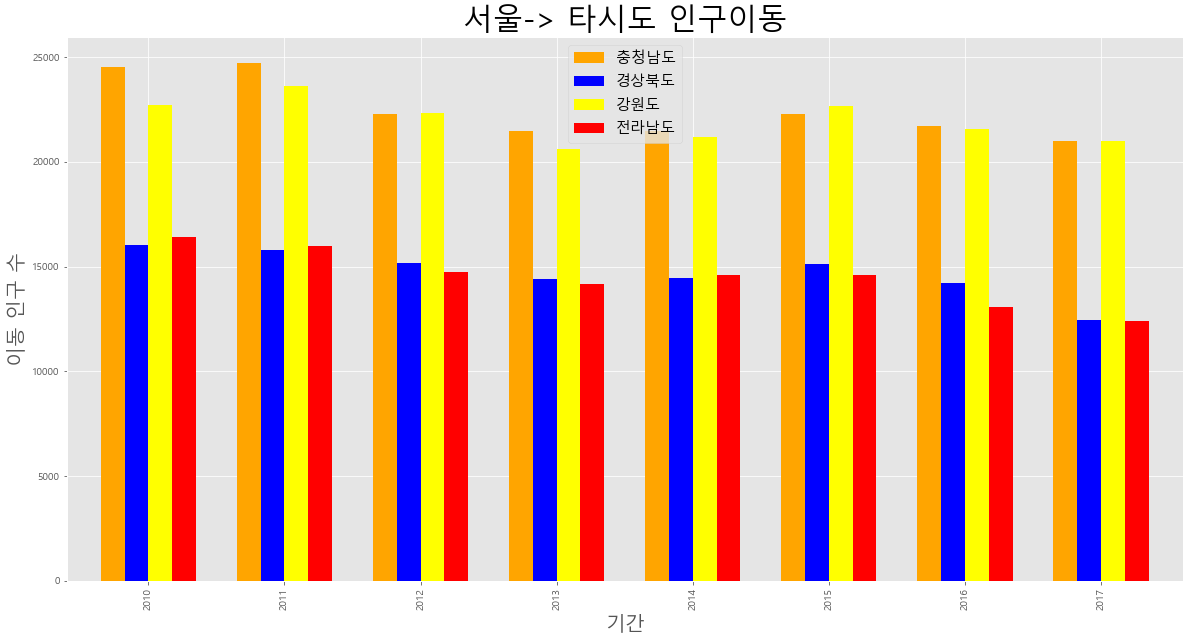

In [53]:
#막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20,10), width=0.7, color=['orange', 'blue', 'yellow','red'])

plt.title('서울-> 타시도 인구이동',size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

In [54]:
# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)
df_4

전입지,충청남도,경상북도,강원도,전라남도,합계
2010,24522,16042,22736,16429,79729.0
2011,24723,15818,23624,15974,80139.0
2012,22269,15191,22332,14765,74557.0
2013,21486,14420,20601,14187,70694.0
2014,21473,14456,21173,14591,71693.0
2015,22299,15113,22659,14598,74669.0
2016,21741,14236,21590,13065,70632.0
2017,21020,12464,21016,12426,66926.0


In [57]:
# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)
df_total

전입지,합계
2017,66926.0
2016,70632.0
2013,70694.0
2014,71693.0
2012,74557.0
2015,74669.0
2010,79729.0
2011,80139.0


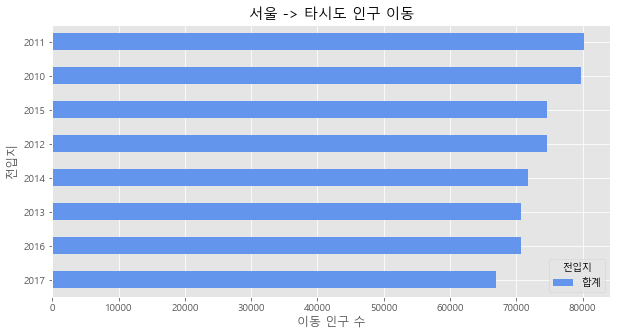

In [55]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

In [63]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./남북한발전전력량.xlsx', convert_float=True)

In [64]:
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [65]:
df =df.loc[5:9]
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [67]:
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df

KeyError: "['전력량 (억㎾h)'] not found in axis"

In [68]:
df.set_index('발전 전력별', inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [69]:
df = df.T 
df

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [70]:
# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [71]:
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['총발전량']

1990    277
1991    263
1992    247
1993    221
1994    231
1995    230
1996    213
1997    193
1998    170
1999    186
2000    194
2001    202
2002    190
2003    196
2004    206
2005    215
2006    225
2007    236
2008    255
2009    235
2010    237
2011    211
2012    215
2013    221
2014    216
2015    190
2016    239
Name: 총발전량, dtype: object

In [72]:
df['총발전량 - 1년']

1990    NaN
1991    277
1992    263
1993    247
1994    221
1995    231
1996    230
1997    213
1998    193
1999    170
2000    186
2001    194
2002    202
2003    190
2004    196
2005    206
2006    215
2007    225
2008    236
2009    255
2010    235
2011    237
2012    211
2013    215
2014    221
2015    216
2016    190
Name: 총발전량 - 1년, dtype: object

In [73]:
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100     
df

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.05415
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.5263
1994,231,138,93,-,221,4.52489
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.3913
1997,193,107,86,-,213,-9.38967
1998,170,102,68,-,193,-11.9171
1999,186,103,83,-,170,9.41176


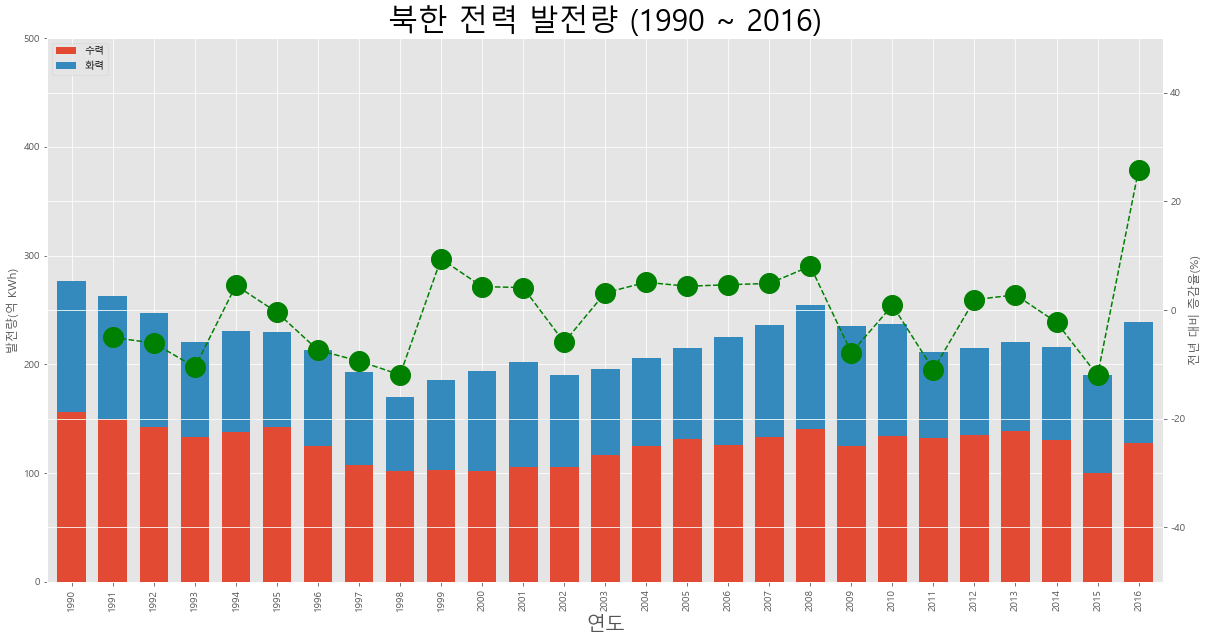

In [74]:
# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

In [76]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [77]:
# deck 열의 NaN 개수 계산하기
nan_deck = df['deck'].value_counts(dropna=False)# 트루면 드랍나 가됨.

print(nan_deck)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64


In [75]:
# isnull() 메서드로 누락 데이터 찾기
print(df.head().isnull())

# notnull() 메서드로 누락 데이터 찾기
print(df.head().notnull())

# isnull() 메서드로 누락 데이터 개수 구하기
print(df.head().isnull().sum(axis=0))

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64
   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  
   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    T

In [79]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# for 반복문으로 각 열의 NaN 개수 계산하기
missing_df = df.isnull()
missing_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()    # 각 열의 NaN 개수 파악

    try: 
        print(col, ': ', missing_count[True])   # NaN 값이 있으면 개수를 출력
    except:
        print(col, ': ', 0)                     # NaN 값이 없으면 0개 출력
        
# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)  
print(df_thresh.columns)

survived :  0
pclass :  0
sex :  0
age :  177
sibsp :  0
parch :  0
fare :  0
embarked :  2
class :  0
who :  0
adult_male :  0
deck :  688
embark_town :  2
alive :  0
alone :  0
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [81]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)  
print(len(df_age))

714


In [82]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
print(df['age'].head(10))
print('\n')

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64




In [85]:
# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'].fillna(mean_age, inplace=True)
df['age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [86]:
# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
print(df['age'].head(10))

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [87]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

# embark_town 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()   
print(most_freq)
print('\n')

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object


Southampton




In [88]:
df['embark_town'].fillna(most_freq, inplace=True)

# embark_town 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object


In [91]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

# embark_town 열의 NaN값을 바로 앞에 있는 828행의 값으로 변경하기
df['embark_town'].fillna(method='ffill', inplace=True)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object


In [92]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2




In [93]:
# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
print(df_dup)
print('\n')

0    False
1     True
2    False
3    False
4    False
dtype: bool




In [94]:
# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df['c2'].duplicated()
print(col_dup)

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


In [95]:
# 데이터프레임에서 중복 행을 제거
df2 = df.drop_duplicates()
print(df2)
print('\n')

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2




In [96]:
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [97]:
# c2, c3열을 기준으로 중복 행을 제거
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


In [99]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [100]:
# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
print(df.head(3))    
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  




In [101]:
# mpg(mile per gallon)를 kpl(kilometer per liter)로 변환 (mpg_to_kpl = 0.425)
mpg_to_kpl = 1.60934 / 3.78541
mpg_to_kpl

0.42514285110463595

In [102]:
# mpg 열에 0.425를 곱한 결과를 새로운 열(kpl)에 추가
df['kpl'] = df['mpg'] * mpg_to_kpl
print(df.head(3))    
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name       kpl  
0       1  chevrolet chevelle malibu  7.652571  
1       1          buick skylark 320  6.377143  
2       1         plymouth satellite  7.652571  




In [104]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.23


In [103]:
# kpl 열을 소수점 아래 둘째 자리에서 반올림 
df['kpl'] = df['kpl'].round(2)
print(df.head(3))     

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name   kpl  
0       1  chevrolet chevelle malibu  7.65  
1       1          buick skylark 320  6.38  
2       1         plymouth satellite  7.65  


In [105]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.23


In [106]:
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 각 열의 자료형 확인
print(df.dtypes)   
print('\n')

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object




In [107]:
# horsepower 열의 고유값 확인
print(df['horsepower'].unique())
print('\n')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']




In [108]:
# 누락 데이터('?') 삭제 
import numpy as np
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 자료형 확인
print(df['horsepower'].dtypes)  
print('\n')

# origin 열의 고유값 확인
print(df['origin'].unique())

# 정수형 데이터를 문자형 데이터로 변환 
df['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'}, inplace=True)

# origin 열의 고유값과 자료형 확인
print(df['origin'].unique())
print(df['origin'].dtypes) 
print('\n')

# origin 열의 문자열 자료형을 범주형으로 변환
df['origin'] = df['origin'].astype('category')     
print(df['origin'].dtypes) 

# 범주형을 문자열로 다시 변환
df['origin'] = df['origin'].astype('str')     
print(df['origin'].dtypes)

# model year 열의 정수형을 범주형으로 변환
print(df['model year'].sample(3))
df['model year'] = df['model year'].astype('category') 
print(df['model year'].sample(3)) 

float64


[1 3 2]
['USA' 'JAPAN' 'EU']
object


category
object
221    77
378    82
325    80
Name: model year, dtype: int64
51     71
81     72
111    73
Name: model year, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]


In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers) 

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 

# horsepower 열, hp_bin 열의 첫 15행을 출력
print(df[['horsepower', 'hp_bin']].head(15))